In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os.path

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# number of generations run
generations = 500

In [3]:
def getData(limit, extension): # retrieve data from base model or extension model
    if extension == True:
        modelString = "ExtensionModel"
    else:
        modelString = "BaseModel"
    location = "Data\\" + modelString  +  "-" + "Gen" + str(generations) + "-" + "Lim" + str(limit) + ".xlsx"
    dfs = []
    version = 1
    while os.path.isfile(location):
        dfs.append(pd.read_excel(location))
        location = "Data\\" + modelString  +  "-" + "Gen" + str(generations) + "-" + "Lim" + str(limit) + "-" + str(version) + ".xlsx"
        version += 1
    return dfs

def addColumns(df): # calculate extra columns
    df['percTruePos'] = (df['nrTruePos'] / df['nrQuestions'])*100
    df['percTrueNeg'] = (df['nrTrueNeg'] / df['nrQuestions'])*100
    df['percFalsePos'] = (df['nrFalsePos'] / df['nrQuestions'])*100
    df['percFalseNeg'] = (df['nrFalseNeg'] / df['nrQuestions'])*100
    df['percTruePosPub'] = (df['nrTruePosPub'] / df['nrQuestionsPub'])*100
    df['percTrueNegPub'] = (df['nrTrueNegPub'] / df['nrQuestionsPub'])*100
    df['percFalsePosPub'] = (df['nrFalsePosPub'] / df['nrQuestionsPub'])*100
    df['percFalseNegPub'] = (df['nrFalseNegPub'] / df['nrQuestionsPub'])*100
    df['FNR'] = df['nrFalseNeg'] / (df['nrFalseNeg'] + df['nrTruePos'])
    df['PPV'] = df['nrTruePos'] / (df['nrTruePos'] + df['nrFalsePos'])
    df['FNRPub'] = df['nrFalseNegPub'] / (df['nrFalseNegPub'] + df['nrTruePosPub'])
    df['PPVPub'] = df['nrTruePosPub'] / (df['nrTruePos'] + df['nrFalsePosPub'])
    df['drawerSizes'] = df['nrQuestions'] - df['nrQuestionsPub']

def getPath(variable): # get path to save an image with the name of plotted variable
    path = "Figures\\" + "Gen" + str(generations) + "-" + variable
    return path

In [4]:
# store dataframes of all runs
dfs_true = getData(True, False)
dfs_false = getData(False, False)
dfs_true_ext = getData(True, True)
dfs_false_ext = getData(False, True)

# count number of runs
nrOfRuns = len(dfs_true)
print("Number of runs:", nrOfRuns)

Number of runs: 13


In [5]:
for df in dfs_true:
    addColumns(df)
for df in dfs_false:
    addColumns(df)
for df in dfs_true_ext:
    addColumns(df)
for df in dfs_false_ext:
    addColumns(df)

In [6]:
df_true = pd.concat(dfs_true)
df_true = df_true.groupby(['Generations']).mean()
df_true.tail()

,nrQuestions,nrQuestionsPub,meanPayoffs,meanSampleSizes,meanPublished,meanPower,meanPowerPub,nrTruePos,nrTrueNeg,nrTruePosPub,nrTrueNegPub,nrFalsePos,nrFalseNeg,nrFalsePosPub,nrFalseNegPub,percTruePos,percTrueNeg,percFalsePos,percFalseNeg,percTruePosPub,percTrueNegPub,percFalsePosPub,percFalseNegPub,FNR,PPV,FNRPub,PPVPub,drawerSizes
Generations,,,,,,,,,,,,,,,,,,,,,,,,,,,,
496,6965.692308,2307.692308,17.418699,136.620513,19.230769,0.311902,0.533482,2013.384615,2277.461538,1787.461538,203.461538,116.615385,2558.230769,102.307692,214.461538,29.441706,32.725178,1.665292,36.167825,77.436741,8.824224,4.439946,9.299089,0.551121,0.945298,0.107327,0.844976,4658.000000
497,6976.846154,2307.692308,17.434885,136.383974,19.230769,0.308957,0.530103,2010.692308,2312.230769,1791.076923,199.076923,117.846154,2536.076923,104.000000,213.538462,29.387250,33.165229,1.685497,35.762025,77.622807,8.621964,4.504892,9.250337,0.548768,0.944620,0.106602,0.847148,4669.153846
498,6985.538462,2316.923077,17.451128,135.851923,19.307692,0.308740,0.529655,1991.153846,2298.384615,1781.153846,204.692308,120.000000,2576.000000,106.538462,224.538462,29.053096,32.878913,1.714711,36.353280,76.868421,8.832321,4.602227,9.697031,0.556011,0.943200,0.112078,0.849210,4668.615385
499,6977.692308,2307.692308,17.458154,136.176282,19.230769,0.311519,0.532629,2026.538462,2266.230769,1794.153846,192.076923,119.769231,2565.153846,105.769231,215.692308,29.608299,32.465280,1.707771,36.218651,77.739710,8.315789,4.590756,9.353745,0.550335,0.944338,0.107426,0.841706,4670.000000
500,6966.923077,2307.692308,17.332269,136.663462,19.230769,0.311011,0.533314,2001.153846,2293.153846,1769.538462,209.076923,114.384615,2558.230769,98.923077,230.153846,29.280477,32.926411,1.640650,36.152462,76.673077,9.063596,4.287112,9.976215,0.552445,0.945940,0.115222,0.842728,4659.230769


In [7]:
df_false = pd.concat(dfs_false)
df_false = df_false.groupby(['Generations']).mean()
df_false.tail()

,nrQuestions,nrQuestionsPub,meanPayoffs,meanSampleSizes,meanPublished,meanPower,meanPowerPub,nrTruePos,nrTrueNeg,nrTruePosPub,nrTrueNegPub,nrFalsePos,nrFalseNeg,nrFalsePosPub,nrFalseNegPub,percTruePos,percTrueNeg,percFalsePos,percFalseNeg,percTruePosPub,percTrueNegPub,percFalsePosPub,percFalseNegPub,FNR,PPV,FNRPub,PPVPub,drawerSizes
Generations,,,,,,,,,,,,,,,,,,,,,,,,,,,,
496,13608.846154,13603.153846,59.792577,7.025000,113.359615,0.071300,0.071299,654.076923,4291.692308,654.076923,4289.615385,194.076923,8469.000000,194.076923,8465.384615,4.817674,31.532285,1.426693,62.223347,4.819561,31.530300,1.427278,62.222861,0.928166,0.768826,0.928138,0.768826,5.692308
497,13607.923077,13602.615385,59.797833,7.058974,113.355128,0.071104,0.071102,656.307692,4307.076923,656.153846,4305.769231,194.461538,8450.076923,194.461538,8446.230769,4.837311,31.653874,1.429620,62.079195,4.838022,31.656587,1.430172,62.075218,0.927668,0.768490,0.927654,0.768326,5.307692
498,13626.923077,13620.769231,59.832788,6.871154,113.506410,0.070876,0.070876,646.923077,4273.076923,646.923077,4271.153846,193.230769,8513.692308,193.230769,8509.461538,4.759820,31.357598,1.418727,62.463855,4.761855,31.357626,1.419359,62.461159,0.929187,0.767275,0.929156,0.767275,6.153846
499,13619.461538,13614.384615,59.872628,6.919231,113.453205,0.070468,0.070468,663.846154,4278.923077,663.846154,4277.538462,196.615385,8480.076923,196.615385,8476.384615,4.888135,31.417620,1.445975,62.248270,4.889801,31.419207,1.446474,62.244518,0.927156,0.769771,0.927129,0.769771,5.076923
500,13626.384615,13622.000000,59.796872,6.824359,113.516667,0.070226,0.070226,635.846154,4315.923077,635.846154,4314.538462,195.923077,8478.692308,195.923077,8475.692308,4.675394,31.672308,1.438919,62.213378,4.676781,31.672366,1.439363,62.211490,0.930100,0.762425,0.930079,0.762425,4.384615


In [8]:
df_true_ext = pd.concat(dfs_true_ext)
df_true_ext = df_true_ext.groupby(['Generations']).mean()
df_true_ext.tail()

,nrQuestions,nrQuestionsPub,meanPayoffs,meanSampleSizes,meanPublished,meanPower,meanPowerPub,nrTruePos,nrTrueNeg,nrTruePosPub,nrTrueNegPub,nrFalsePos,nrFalseNeg,nrFalsePosPub,nrFalseNegPub,percTruePos,percTrueNeg,percFalsePos,percFalseNeg,percTruePosPub,percTrueNegPub,percFalsePosPub,percFalseNegPub,FNR,PPV,FNRPub,PPVPub,drawerSizes
Generations,,,,,,,,,,,,,,,,,,,,,,,,,,,,
496,2269.307692,2232.615385,16.584872,647.310256,18.605128,0.583124,0.582882,1290.076923,708.384615,1268.615385,697.615385,36.769231,234.076923,36.461538,229.923077,56.851037,31.221299,1.618780,10.308884,56.824544,31.246064,1.631639,10.297753,0.153477,0.972337,0.153401,0.956503,36.692308
497,2269.153846,2223.153846,16.553038,647.401923,18.526282,0.587241,0.587545,1299.923077,699.769231,1274.846154,684.307692,36.000000,233.461538,35.384615,228.615385,57.295254,30.835644,1.586185,10.282916,57.346041,30.784804,1.591827,10.277328,0.152171,0.973065,0.151988,0.954720,46.000000
498,2270.307692,2206.000000,16.393506,646.809615,18.383333,0.582799,0.583114,1284.307692,706.615385,1248.692308,686.230769,39.461538,239.923077,38.307692,232.769231,56.576918,31.121804,1.738338,10.562940,56.604777,31.103575,1.736447,10.555202,0.157423,0.970213,0.157252,0.944190,64.307692
499,2270.846154,2224.846154,16.543699,646.533974,18.540385,0.583771,0.583750,1291.615385,714.692308,1265.692308,700.384615,34.384615,230.153846,33.769231,225.000000,56.883187,31.475629,1.513810,10.127373,56.884756,31.483762,1.516321,10.115161,0.151120,0.974088,0.150965,0.954939,46.000000
500,2271.846154,2216.538462,16.486295,646.414103,18.471154,0.583215,0.583256,1287.538462,709.538462,1255.769231,692.461538,38.230769,236.538462,37.384615,230.923077,56.679161,31.231393,1.683629,10.405817,56.653979,31.242809,1.688354,10.414859,0.155099,0.971163,0.155279,0.947900,55.307692


In [9]:
df_false_ext = pd.concat(dfs_false_ext)
df_false_ext = df_false_ext.groupby(['Generations']).mean()
df_false_ext.tail()

,nrQuestions,nrQuestionsPub,meanPayoffs,meanSampleSizes,meanPublished,meanPower,meanPowerPub,nrTruePos,nrTrueNeg,nrTruePosPub,nrTrueNegPub,nrFalsePos,nrFalseNeg,nrFalsePosPub,nrFalseNegPub,percTruePos,percTrueNeg,percFalsePos,percFalseNeg,percTruePosPub,percTrueNegPub,percFalsePosPub,percFalseNegPub,FNR,PPV,FNRPub,PPVPub,drawerSizes
Generations,,,,,,,,,,,,,,,,,,,,,,,,,,,,
496,13602.615385,13596.307692,29.846622,7.139103,113.302564,0.072131,0.072126,638.384615,4304.461538,638.307692,4301.538462,190.153846,8469.615385,190.153846,8466.307692,4.706368,31.643142,1.398391,62.252099,4.707931,31.636386,1.399039,62.256645,0.929723,0.767613,0.929705,0.767535,6.307692
497,13576.461538,13571.615385,29.872981,7.399359,113.096795,0.073100,0.073100,672.846154,4265.538462,672.846154,4264.384615,190.076923,8448.000000,190.076923,8444.307692,4.974691,31.415371,1.400776,62.209162,4.976455,31.418027,1.401268,62.204250,0.925984,0.775787,0.925955,0.775787,4.846154
498,13567.461538,13561.153846,29.836269,7.491667,113.009615,0.073320,0.073321,661.692308,4256.384615,661.692308,4254.000000,191.461538,8457.923077,191.461538,8454.000000,4.895339,31.369757,1.410962,62.323943,4.897556,31.366757,1.411598,62.324089,0.927198,0.771672,0.927168,0.771672,6.307692
499,13596.153846,13589.538462,29.865423,7.214103,113.246154,0.072585,0.072586,659.769231,4295.153846,659.769231,4292.923077,184.923077,8456.307692,184.923077,8451.923077,4.871205,31.585238,1.362016,62.181541,4.873481,31.584167,1.362662,62.179690,0.927398,0.777724,0.927365,0.777724,6.615385
500,13616.230769,13608.923077,29.854429,7.049359,113.407692,0.072030,0.072030,625.307692,4319.769231,625.307692,4317.461538,191.615385,8479.538462,191.615385,8474.538462,4.608803,31.726041,1.409112,62.256044,4.611181,31.726232,1.409849,62.252738,0.931042,0.762846,0.931005,0.762846,7.307692


In [10]:
nrGenerations = len(df_true)
print("Number of generations:", nrGenerations)
y_generations = np.arange(1, nrGenerations+1) # generate y-axis values for number of generations

font = {'fontname':'Gadugi'}
title1 = '(a) No incentive for informative research'
title2 = '(b) Incentive for informative research'

plt.rcParams["figure.figsize"] = (24,7)

Number of generations: 500


### Mean Total Payoffs

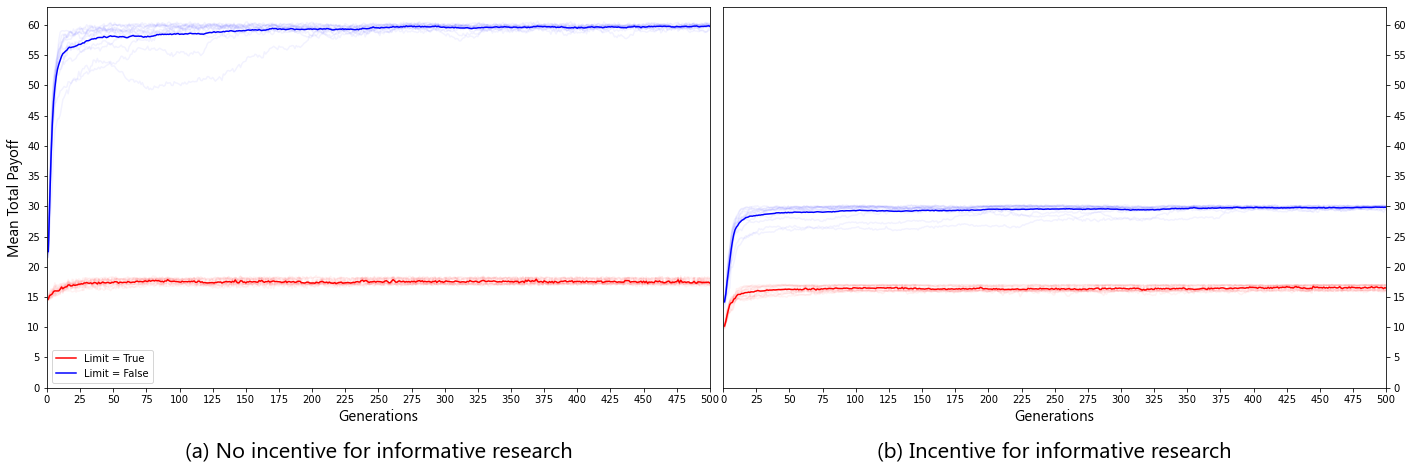

In [11]:
# column name and variable name
columnName = 'meanPayoffs'
y_label = 'Mean Total Payoff'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName, data=dfs_false[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model
ax1.plot(y_generations, columnName, data=df_true, c='red', label = "Limit = True")
ax1.plot(y_generations, columnName, data=df_false, c='blue', label = "Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model extension
ax2.plot(y_generations, columnName, data=df_true_ext, c='red', label = "Limit = True")
ax2.plot(y_generations, columnName, data=df_false_ext, c='blue', label = "Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 5))
ax2.set_yticks(np.arange(0, ylim, 5))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanTotalPayoffs")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### Mean Sample Sizes

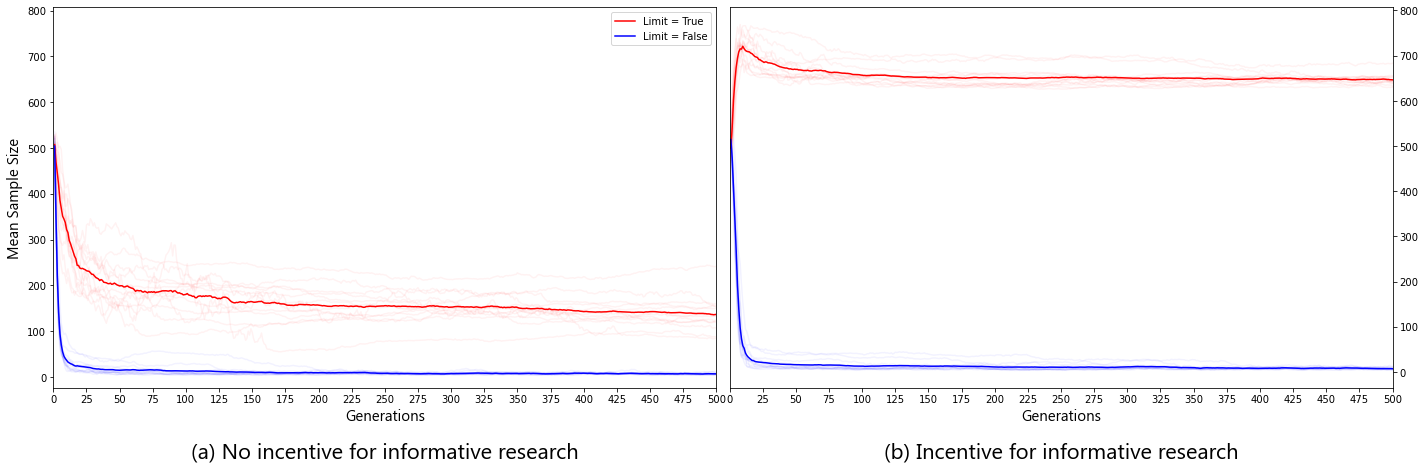

In [12]:
# column name and variable name
columnName = 'meanSampleSizes'
y_label = 'Mean Sample Size'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName, data=dfs_false[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model
ax1.plot(y_generations, columnName, data=df_true, c='red', label = "Limit = True")
ax1.plot(y_generations, columnName, data=df_false, c='blue', label = "Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model extension
ax2.plot(y_generations, columnName, data=df_true_ext, c='red', label = "Limit = True")
ax2.plot(y_generations, columnName, data=df_false_ext, c='blue', label = "Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanSampleSize")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### Mean Number of Publications

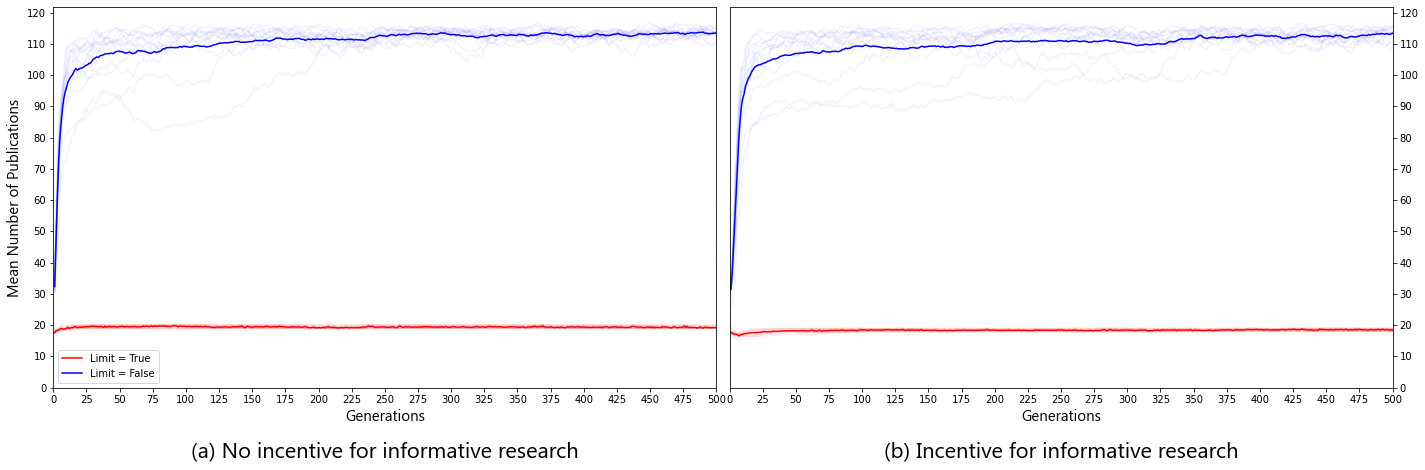

In [13]:
# column name and variable name
columnName = 'meanPublished'
y_label = 'Mean Number of Publications'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName, data=dfs_false[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model
ax1.plot(y_generations, columnName, data=df_true, c='red', label = "Limit = True")
ax1.plot(y_generations, columnName, data=df_false, c='blue', label = "Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model extension
ax2.plot(y_generations, columnName, data=df_true_ext, c='red', label = "Limit = True")
ax2.plot(y_generations, columnName, data=df_false_ext, c='blue', label = "Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 10))
ax2.set_yticks(np.arange(0, ylim, 10))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanPublications")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### Mean Statistical Power (all FINISHED questions)

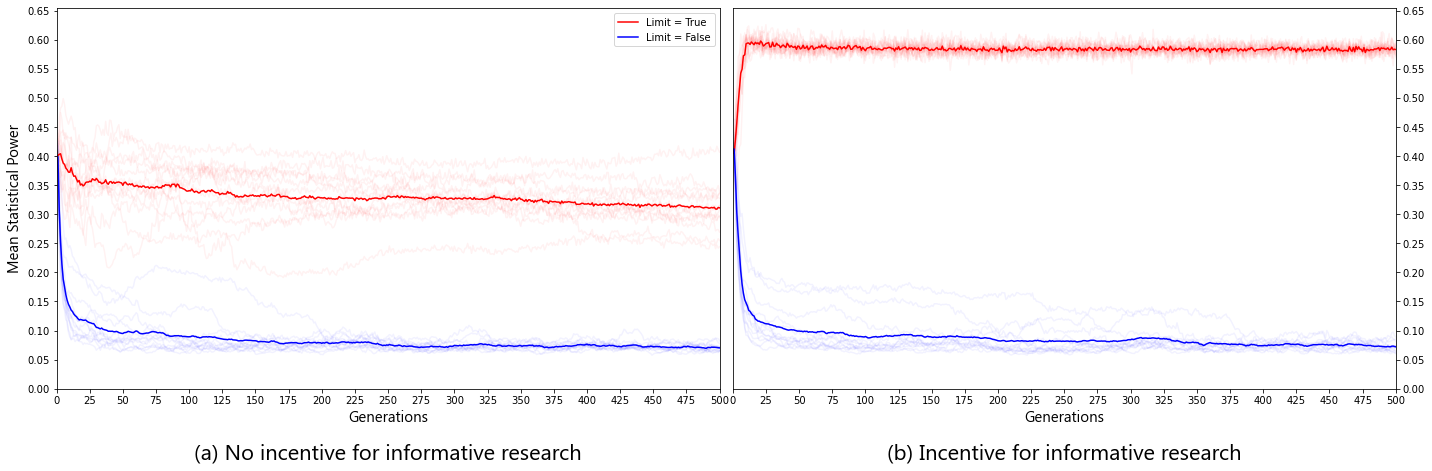

In [14]:
# column name and variable name
columnName = 'meanPower'
y_label = 'Mean Statistical Power'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName, data=dfs_false[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model
ax1.plot(y_generations, columnName, data=df_true, c='red', label = "Limit = True")
ax1.plot(y_generations, columnName, data=df_false, c='blue', label = "Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model extension
ax2.plot(y_generations, columnName, data=df_true_ext, c='red', label = "Limit = True")
ax2.plot(y_generations, columnName, data=df_false_ext, c='blue', label = "Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 0.05))
ax2.set_yticks(np.arange(0, ylim, 0.05))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanStatPower")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### Mean Statistical Power (all PUBLISHED questions)

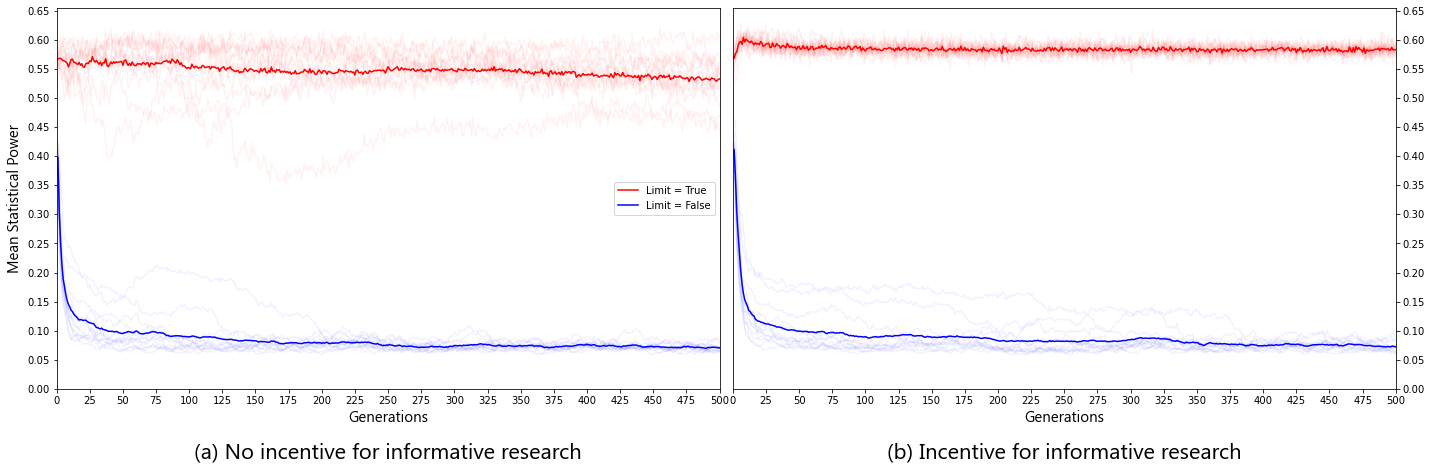

In [15]:
# column name and variable name
columnName = 'meanPowerPub'
y_label = 'Mean Statistical Power'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName, data=dfs_false[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model
ax1.plot(y_generations, columnName, data=df_true, c='red', label = "Limit = True")
ax1.plot(y_generations, columnName, data=df_false, c='blue', label = "Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model extension
ax2.plot(y_generations, columnName, data=df_true_ext, c='red', label = "Limit = True")
ax2.plot(y_generations, columnName, data=df_false_ext, c='blue', label = "Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 0.05))
ax2.set_yticks(np.arange(0, ylim, 0.05))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanStatPowerPub")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### % True Positives and True Negatives Percentages (all FINISHED questions)

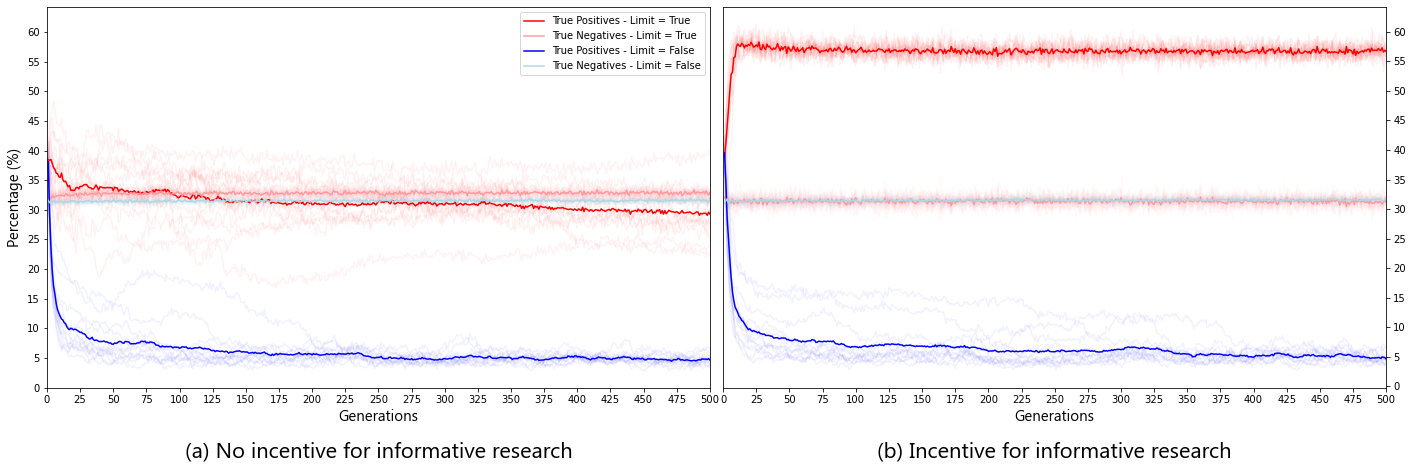

In [16]:
# column name and variable name
columnName1 = 'percTruePos'
columnName2 = 'percTrueNeg'
y_label = 'Percentage (%)'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName1, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName1, data=dfs_false[i], alpha=0.05, c='blue', label='')
    ax1.plot('Generations', columnName2, data=dfs_true[i], alpha=0.05, c='#ff99a0', label='')
    ax1.plot('Generations', columnName2, data=dfs_false[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model
ax1.plot(y_generations, columnName1, data=df_true, c='red', label = "True Positives - Limit = True")
ax1.plot(y_generations, columnName2, data=df_true, c='#ff99a0', label = "True Negatives - Limit = True")

ax1.plot(y_generations, columnName1, data=df_false, c='blue', label = "True Positives - Limit = False")
ax1.plot(y_generations, columnName2, data=df_false, c='lightblue', label = "True Negatives - Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName1, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName1, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    ax2.plot('Generations', columnName2, data=dfs_true_ext[i], alpha=0.05, c='#ff99a0', label='')
    ax2.plot('Generations', columnName2, data=dfs_false_ext[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model extension
ax2.plot(y_generations, columnName1, data=df_true_ext, c='red', label = "True Positives - Limit = True")
ax2.plot(y_generations, columnName2, data=df_true_ext, c='#ff99a0', label = "True Negatives - Limit = True")

ax2.plot(y_generations, columnName1, data=df_false_ext, c='blue', label = "True Positives - Limit = False")
ax2.plot(y_generations, columnName2, data=df_false_ext, c='lightblue', label = "True Negatives - Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 5))
ax2.set_yticks(np.arange(0, ylim, 5))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanTrueRates")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### % True Positives and True Negatives Percentages (all PUBLISHED questions)

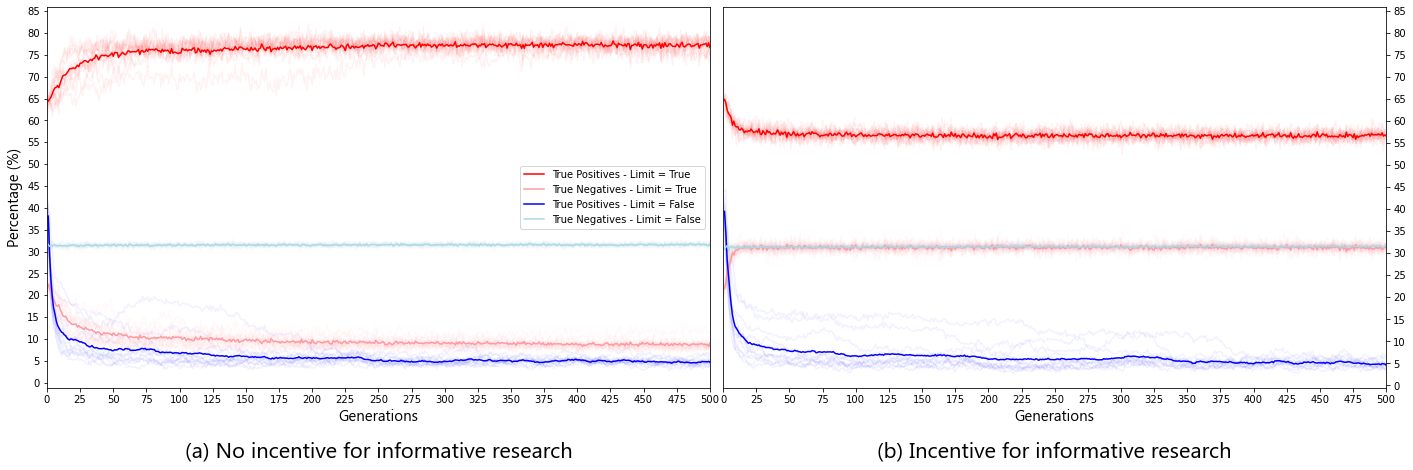

In [17]:
# column name and variable name
columnName1 = 'percTruePosPub'
columnName2 = 'percTrueNegPub'
y_label = 'Percentage (%)'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName1, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName1, data=dfs_false[i], alpha=0.05, c='blue', label='')
    ax1.plot('Generations', columnName2, data=dfs_true[i], alpha=0.05, c='#ff99a0', label='')
    ax1.plot('Generations', columnName2, data=dfs_false[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model
ax1.plot(y_generations, columnName1, data=df_true, c='red', label = "True Positives - Limit = True")
ax1.plot(y_generations, columnName2, data=df_true, c='#ff99a0', label = "True Negatives - Limit = True")

ax1.plot(y_generations, columnName1, data=df_false, c='blue', label = "True Positives - Limit = False")
ax1.plot(y_generations, columnName2, data=df_false, c='lightblue', label = "True Negatives - Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName1, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName1, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    ax2.plot('Generations', columnName2, data=dfs_true_ext[i], alpha=0.05, c='#ff99a0', label='')
    ax2.plot('Generations', columnName2, data=dfs_false_ext[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model extension
ax2.plot(y_generations, columnName1, data=df_true_ext, c='red', label = "True Positives - Limit = True")
ax2.plot(y_generations, columnName2, data=df_true_ext, c='#ff99a0', label = "True Negatives - Limit = True")

ax2.plot(y_generations, columnName1, data=df_false_ext, c='blue', label = "True Positives - Limit = False")
ax2.plot(y_generations, columnName2, data=df_false_ext, c='lightblue', label = "True Negatives - Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 5))
ax2.set_yticks(np.arange(0, ylim, 5))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanTrueRatesPub")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### % False Positives and False Negatives (all FINISHED questions)

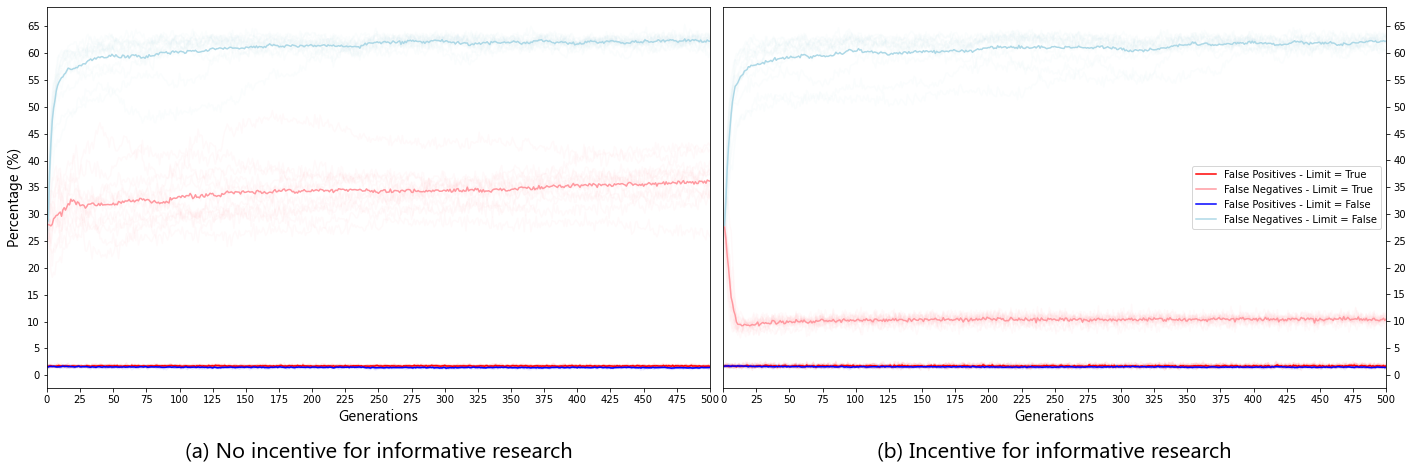

In [18]:
# column name and variable name
columnName1 = 'percFalsePos'
columnName2 = 'percFalseNeg'
y_label = 'Percentage (%)'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName1, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName1, data=dfs_false[i], alpha=0.05, c='blue', label='')
    ax1.plot('Generations', columnName2, data=dfs_true[i], alpha=0.05, c='#ff99a0', label='')
    ax1.plot('Generations', columnName2, data=dfs_false[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model
ax1.plot(y_generations, columnName1, data=df_true, c='red', label = "False Positives - Limit = True")
ax1.plot(y_generations, columnName2, data=df_true, c='#ff99a0', label = "False Negatives - Limit = True")

ax1.plot(y_generations, columnName1, data=df_false, c='blue', label = "False Positives - Limit = False")
ax1.plot(y_generations, columnName2, data=df_false, c='lightblue', label = "False Negatives - Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName1, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName1, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    ax2.plot('Generations', columnName2, data=dfs_true_ext[i], alpha=0.05, c='#ff99a0', label='')
    ax2.plot('Generations', columnName2, data=dfs_false_ext[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model extension
ax2.plot(y_generations, columnName1, data=df_true_ext, c='red', label = "False Positives - Limit = True")
ax2.plot(y_generations, columnName2, data=df_true_ext, c='#ff99a0', label = "False Negatives - Limit = True")

ax2.plot(y_generations, columnName1, data=df_false_ext, c='blue', label = "False Positives - Limit = False")
ax2.plot(y_generations, columnName2, data=df_false_ext, c='lightblue', label = "False Negatives - Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 5))
ax2.set_yticks(np.arange(0, ylim, 5))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax2.legend();

# save plot as figure
loc = getPath("MeanFalseRates")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### % False Positives and False Negatives (all PUBLISHED questions)

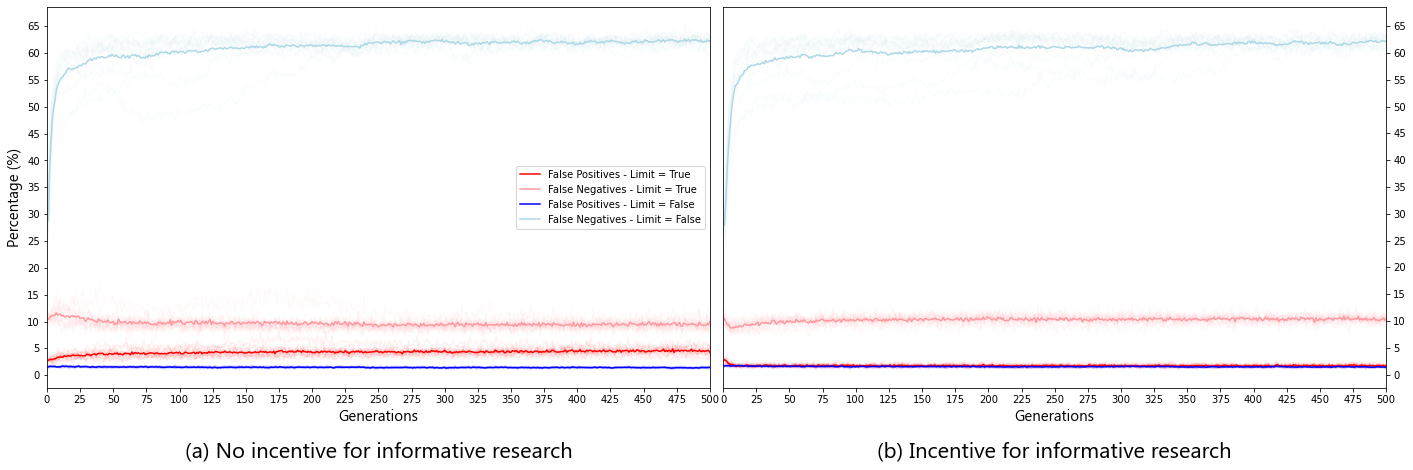

In [19]:
# column name and variable name
columnName1 = 'percFalsePosPub'
columnName2 = 'percFalseNegPub'
y_label = 'Percentage (%)'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName1, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName1, data=dfs_false[i], alpha=0.05, c='blue', label='')
    ax1.plot('Generations', columnName2, data=dfs_true[i], alpha=0.05, c='#ff99a0', label='')
    ax1.plot('Generations', columnName2, data=dfs_false[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model
ax1.plot(y_generations, columnName1, data=df_true, c='red', label = "False Positives - Limit = True")
ax1.plot(y_generations, columnName2, data=df_true, c='#ff99a0', label = "False Negatives - Limit = True")

ax1.plot(y_generations, columnName1, data=df_false, c='blue', label = "False Positives - Limit = False")
ax1.plot(y_generations, columnName2, data=df_false, c='lightblue', label = "False Negatives - Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName1, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName1, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    ax2.plot('Generations', columnName2, data=dfs_true_ext[i], alpha=0.05, c='#ff99a0', label='')
    ax2.plot('Generations', columnName2, data=dfs_false_ext[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model extension
ax2.plot(y_generations, columnName1, data=df_true_ext, c='red', label = "False Positives - Limit = True")
ax2.plot(y_generations, columnName2, data=df_true_ext, c='#ff99a0', label = "False Negatives - Limit = True")

ax2.plot(y_generations, columnName1, data=df_false_ext, c='blue', label = "False Positives - Limit = False")
ax2.plot(y_generations, columnName2, data=df_false_ext, c='lightblue', label = "False Negatives - Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 5))
ax2.set_yticks(np.arange(0, ylim, 5))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanFalseRatesPub")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### Ratios: FNR & PPV (all FINISHED questions)

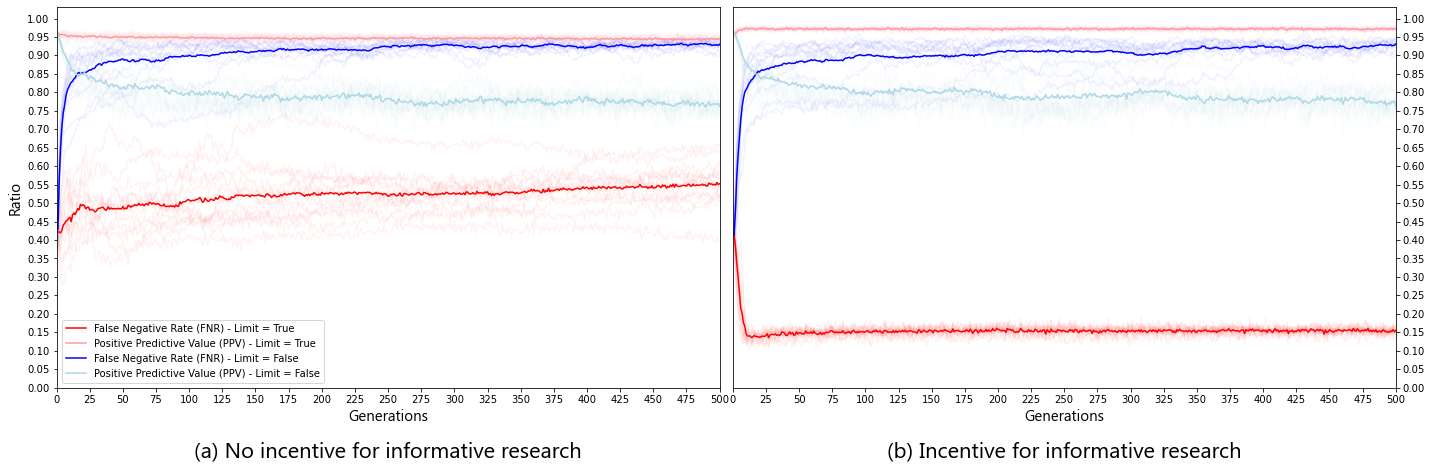

In [20]:
# column name and variable name
columnName1 = 'FNR'
columnName2 = 'PPV'
y_label = 'Ratio'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName1, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName1, data=dfs_false[i], alpha=0.05, c='blue', label='')
    ax1.plot('Generations', columnName2, data=dfs_true[i], alpha=0.05, c='#ff99a0', label='')
    ax1.plot('Generations', columnName2, data=dfs_false[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model
ax1.plot(y_generations, columnName1, data=df_true, c='red', label = "False Negative Rate (FNR) - Limit = True")
ax1.plot(y_generations, columnName2, data=df_true, c='#ff99a0', label = "Positive Predictive Value (PPV) - Limit = True")

ax1.plot(y_generations, columnName1, data=df_false, c='blue', label = "False Negative Rate (FNR) - Limit = False")
ax1.plot(y_generations, columnName2, data=df_false, c='lightblue', label = "Positive Predictive Value (PPV) - Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName1, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName1, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    ax2.plot('Generations', columnName2, data=dfs_true_ext[i], alpha=0.05, c='#ff99a0', label='')
    ax2.plot('Generations', columnName2, data=dfs_false_ext[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model extension
ax2.plot(y_generations, columnName1, data=df_true_ext, c='red', label = "False Negative Rate (FNR) - Limit = True")
ax2.plot(y_generations, columnName2, data=df_true_ext, c='#ff99a0', label = "Positive Predictive Value (PPV) - Limit = True")

ax2.plot(y_generations, columnName1, data=df_false_ext, c='blue', label = "False Negative Rate (FNR) - Limit = False")
ax2.plot(y_generations, columnName2, data=df_false_ext, c='lightblue', label = "Positive Predictive Value (PPV) - Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 0.05))
ax2.set_yticks(np.arange(0, ylim, 0.05))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanRatios")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### Ratios: FNR & PPV (all PUBLISHED questions)

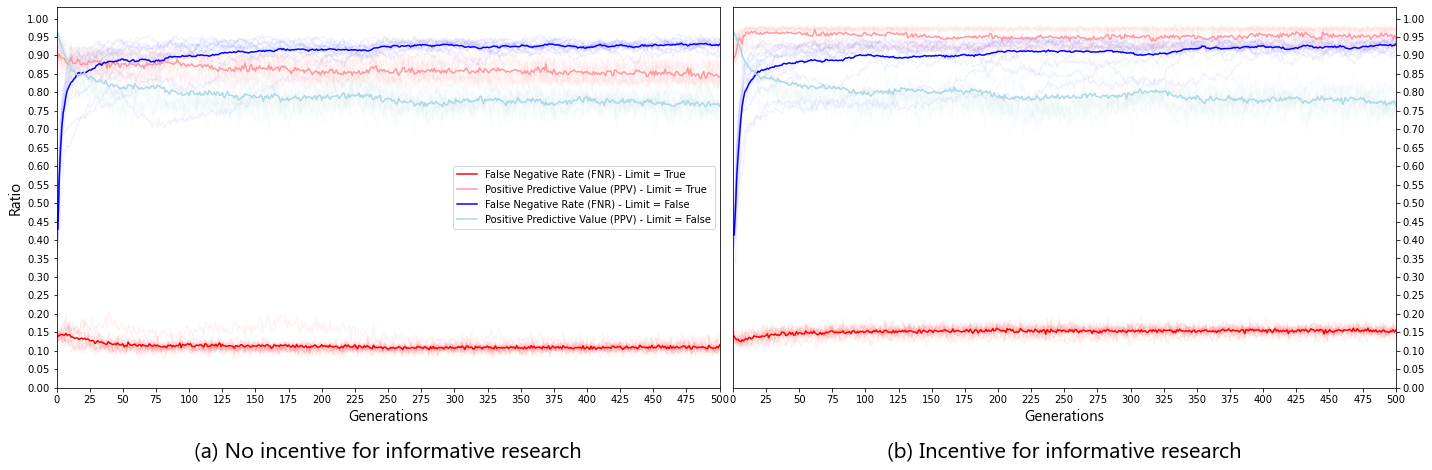

In [21]:
# column name and variable name
columnName1 = 'FNRPub'
columnName2 = 'PPVPub'
y_label = 'Ratio'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName1, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName1, data=dfs_false[i], alpha=0.05, c='blue', label='')
    ax1.plot('Generations', columnName2, data=dfs_true[i], alpha=0.05, c='#ff99a0', label='')
    ax1.plot('Generations', columnName2, data=dfs_false[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model
ax1.plot(y_generations, columnName1, data=df_true, c='red', label = "False Negative Rate (FNR) - Limit = True")
ax1.plot(y_generations, columnName2, data=df_true, c='#ff99a0', label = "Positive Predictive Value (PPV) - Limit = True")

ax1.plot(y_generations, columnName1, data=df_false, c='blue', label = "False Negative Rate (FNR) - Limit = False")
ax1.plot(y_generations, columnName2, data=df_false, c='lightblue', label = "Positive Predictive Value (PPV) - Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName1, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName1, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    ax2.plot('Generations', columnName2, data=dfs_true_ext[i], alpha=0.05, c='#ff99a0', label='')
    ax2.plot('Generations', columnName2, data=dfs_false_ext[i], alpha=0.05, c='lightblue', label='')

# plot average line for base model extension
ax2.plot(y_generations, columnName1, data=df_true_ext, c='red', label = "False Negative Rate (FNR) - Limit = True")
ax2.plot(y_generations, columnName2, data=df_true_ext, c='#ff99a0', label = "Positive Predictive Value (PPV) - Limit = True")

ax2.plot(y_generations, columnName1, data=df_false_ext, c='blue', label = "False Negative Rate (FNR) - Limit = False")
ax2.plot(y_generations, columnName2, data=df_false_ext, c='lightblue', label = "Positive Predictive Value (PPV) - Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 0.05))
ax2.set_yticks(np.arange(0, ylim, 0.05))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax1.legend();

# save plot as figure
loc = getPath("MeanRatiosPub")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)

### Mean Number of Studies Stored in File Drawers

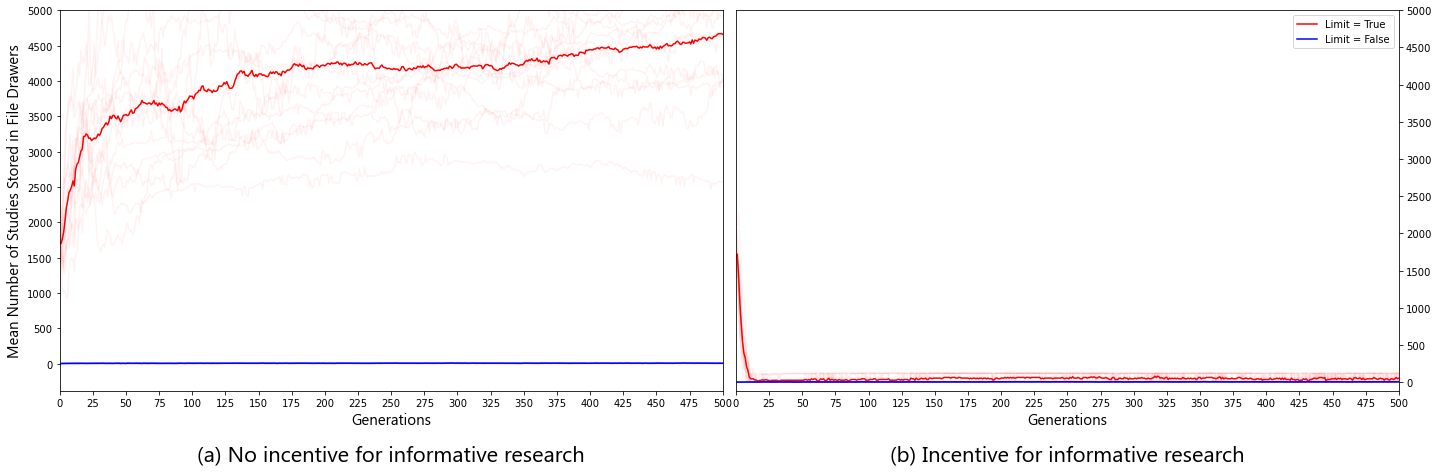

In [22]:
# column name and variable name
columnName = 'drawerSizes'
y_label = 'Mean Number of Studies Stored in File Drawers'

# initialize plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.02)

# figure captions
ax1.set_title(title1, **font, y=-0.2, size=22)
ax2.set_title(title2, **font, y=-0.2, size=22)

# plot base model data
for i in range(nrOfRuns):
    ax1.plot('Generations', columnName, data=dfs_true[i], alpha=0.05, c='red', label='')
    ax1.plot('Generations', columnName, data=dfs_false[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model
ax1.plot(y_generations, columnName, data=df_true, c='red', label = "Limit = True")
ax1.plot(y_generations, columnName, data=df_false, c='blue', label = "Limit = False")

# plot base model extension data
for i in range(nrOfRuns):
    ax2.plot('Generations', columnName, data=dfs_true_ext[i], alpha=0.05, c='red', label='')
    ax2.plot('Generations', columnName, data=dfs_false_ext[i], alpha=0.05, c='blue', label='')
    
# plot average line for base model extension
ax2.plot(y_generations, columnName, data=df_true_ext, c='red', label = "Limit = True")
ax2.plot(y_generations, columnName, data=df_false_ext, c='blue', label = "Limit = False")

# range limit
ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ylim = 5001
ax1.set_ylim(top=ylim)
ax2.set_ylim(top=ylim)

# ticks and labels
ax1.set_xlim(0, 500)
ax2.set_xlim(0, 500)
ax1.set_xticks(np.arange(0, 501, 25))
ax2.set_xticks(np.arange(0, 501, 25))
ax1.set_yticks(np.arange(0, ylim, 500))
ax2.set_yticks(np.arange(0, ylim, 500))
ax2.yaxis.tick_right()

ax1.set_xlabel('Generations', **font, size=15)
ax2.set_xlabel('Generations', **font, size=15)
ax1.set_ylabel(y_label, **font, size=15)

# plot legend
ax2.legend();

# save plot as figure
loc = getPath("MeanDrawerSize")
plt.savefig(loc, dpi=160, bbox_inches='tight', pad_inches = 0)